<a href="https://colab.research.google.com/github/Abel-BC/Bedu_ML/blob/main/Proyecto_Equipo23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.- Contexto y descripción del Dataset

In [ ]:
"""

Contexto y descripción del dataset:
El análisis de personalidad del cliente ayuda al negocio a entender y hacer más facil la modificación de sus productos de acuerdo a la necesidad específica y comportamiento de sus clientes.

Campos:

Clientes
ID: Identificador del cliente.
Year_Birth: Año de nacimiento
Education: Nivel educativo
Marital_Status: Estado Civil
Income: Sueldo
Kidhome: Número de niños en casa.
Teenhome: Número de adolescentes en casa.
Dt_Customer: Fecha en que se volvió cliente.
Recency: Días desde su última compra.
Complain: 1 si el cliente se quejó en los últimos 2 años, 0 si no fue así.

Productos
MntWines: Gasto por vinos en los últimos 2 años.
MntFruits: Gasto por frutas en los últimos 2 años.
MntMeatProducts: Gasto carne en los últimos 2 años.
MntFishProducts: Gasto por pescado en los últimos 2 años.
MntSweetProducts: Gasto por dulces en los últimos 2 años.
MntGoldProds: Gasto por oro en los últimos 2 años.

Promociones
NumDealsPurchases: Número de compras con descuento realizadas.
AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ra campaña, 0 si no fue así.
AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2da campaña, 0 si no fue así.
AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ra campaña, 0 si no fue así.
AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ta campaña, 0 si no fue así.
AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ta campaña, 0 si no fue así.
Response: 1 si el cliente aceptó la oferta en la última campaña, 0 si no fue así.

Lugar
NumWebPurchases: Número de compras realizadas a través de la página web de la tienda.
NumCatalogPurchases: Número de compras realizadas usando un catálogo.
NumStorePurchases: Número de compras realizadas directamente en tienda.
NumWebVisitsMonth: Número de visitas al sitio web realizadas en el último mes.

"""

# 1.- Análisis Exploratorio de Datos

In [ ]:
#1.- Análisis Exploratorio de datos
#Librerías
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leer el dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Información de columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#14 valores nulos en Income, puesto que son pocos, se van a eliminar las filas quedando 2216.
#Remover filas nulas
data = data.dropna()
print("Filas totales: ", len(data))

Filas totales:  2216


In [ ]:
#Dt_Customer no es fecha, habrá que convertirlo.
#Convertir Dt_Customer a fecha y calcular cuantos días han sido clientes
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"].dt.days, errors="coerce")


In [ ]:
#Conteo de las categorías en columnas categóricas.
print(data["Marital_Status"].value_counts(), "\n")
print(data["Education"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
#Crearemos nuevas columnas a partir del dataset original

#Edad del cliente
data["Age"] = 2023-data["Year_Birth"]

#Gasto
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#¿Vive solo o acompañado?
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Total de hijos
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Total de miembros en la familia
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#¿Es padre?
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Nivel educativo (3 categorías: no graduado, graduado y posgrado)
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Eliminar columnas no necesarias
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

#Estadísticas
data.describe() #Notar el sueldo máximo y la edad máxima muy alejados de la media. (la edad de 130 años es ilógica).

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


In [ ]:
#Quitar valores atípicos de edad y sueldo (En total se quitaron 4 filas)
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print(len(data))

2212


<Axes: >

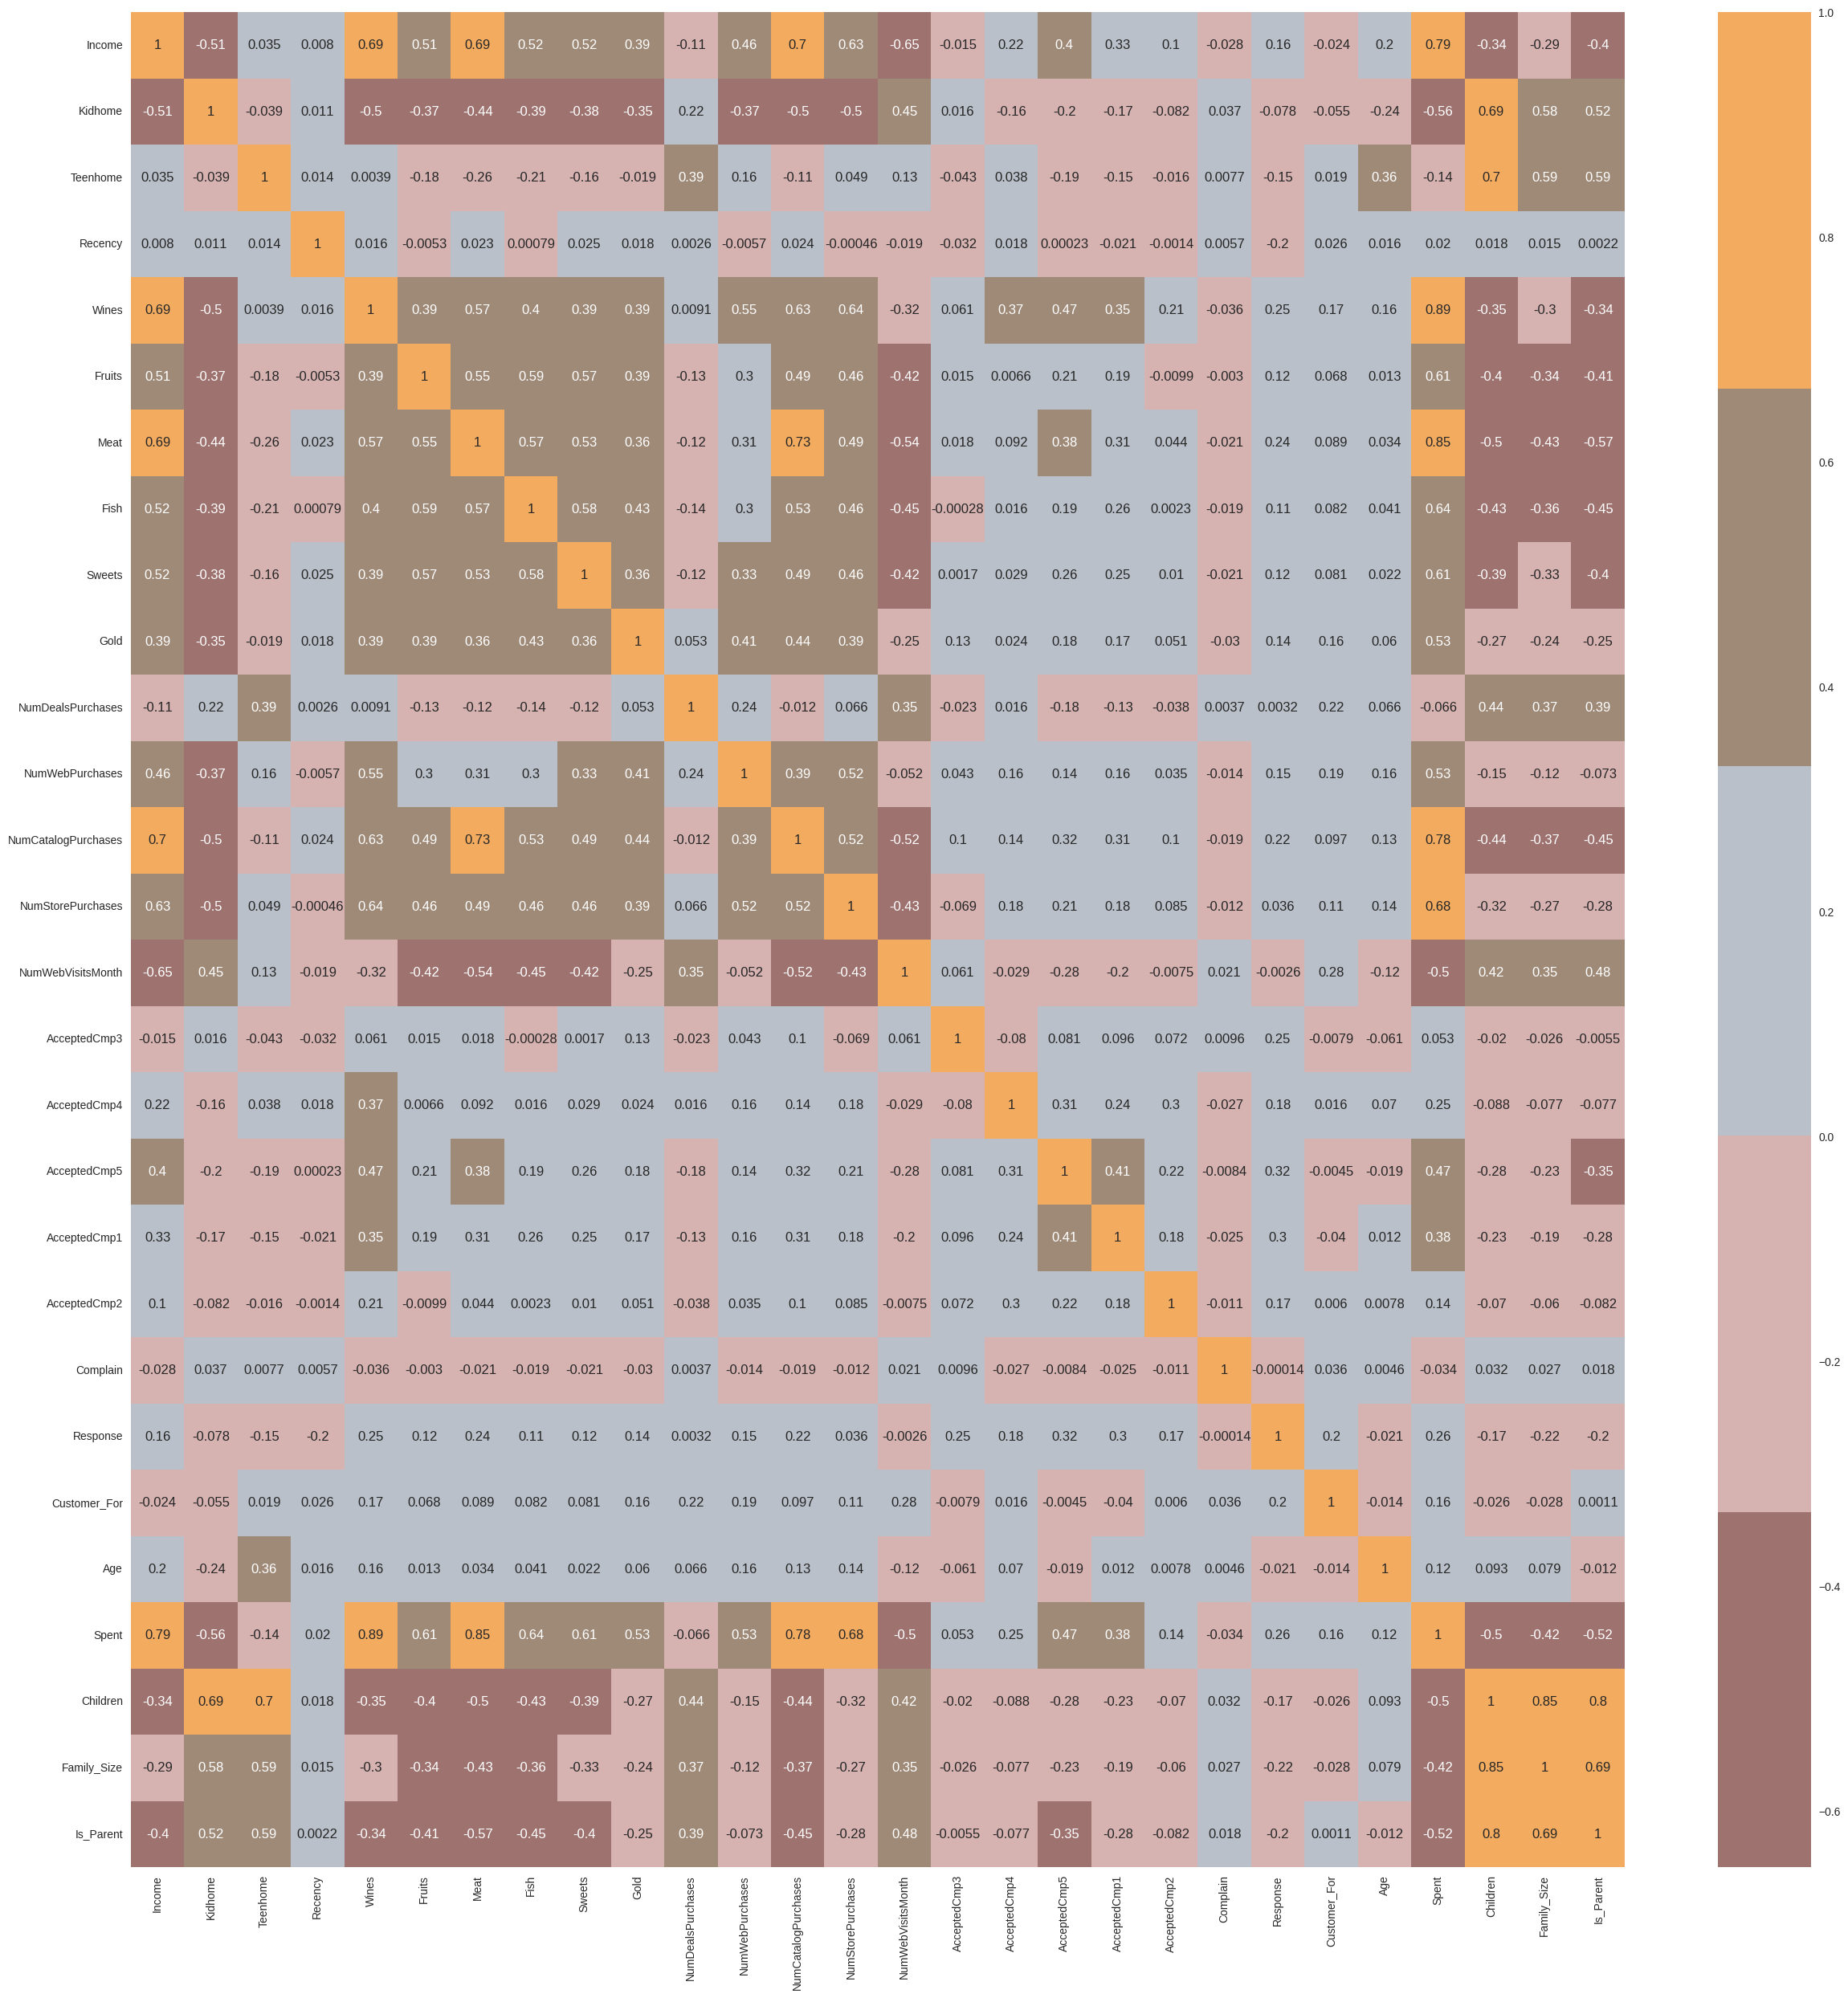

In [ ]:
#Matriz de correlación para datos no categóricos
to_drop = ["Education","Living_With"]
no_categorical = data.drop(to_drop, axis=1)
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= no_categorical.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# 2.- Preprocesamiento de datos y reducción de dimensiones

In [ ]:
#2.- Preprocesamiento de datos y reducción de dimensiones.
#Crear lista con variables categóricas.
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Education', 'Living_With']


In [ ]:
#Label Encoding para variables categóricas
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
#Copiar Dataset
ds = data.copy()

#Subset eliminando promociones
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [ ]:
#Reducción a 3 dimensiones mediante Principal Component Analysis para quedarnos con las variables principales y quitar redundancias (variables correlacionadas).
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.284887e-17,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,3.212219e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,1.606109e-18,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


# 3.- Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

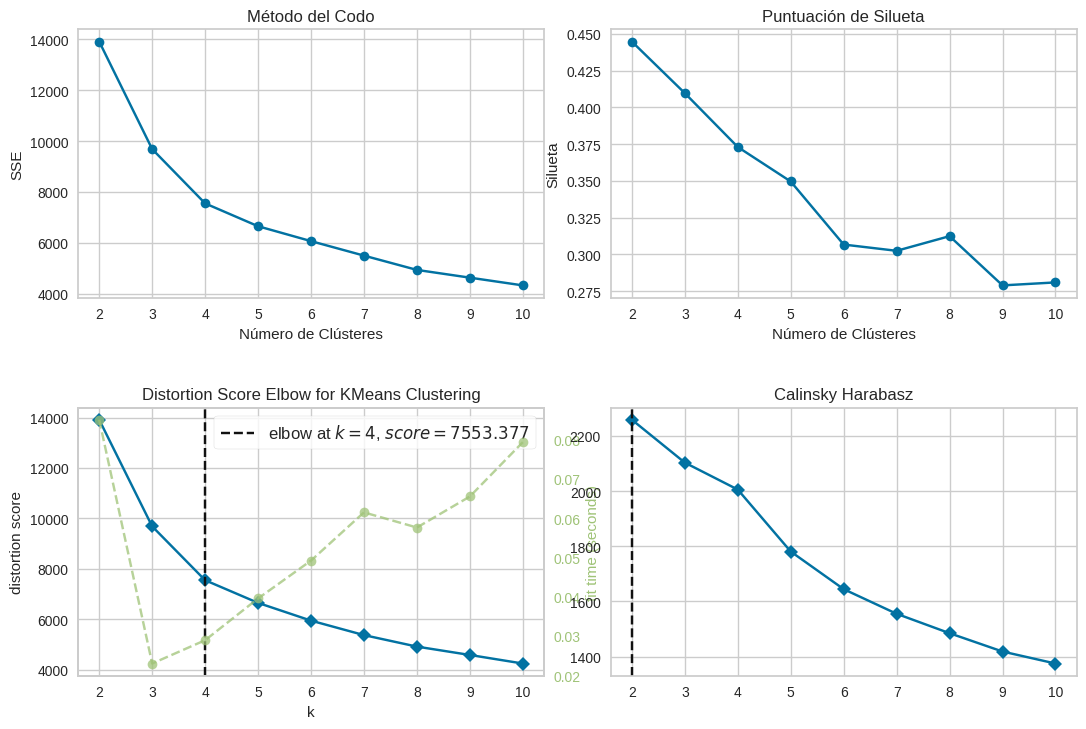

In [ ]:
#Empleamos diferentes métodos para obtener el número de clusters (k). Método del codo, silhouette, calinsky harabasz

# Encontrar el número óptimo de clústeres utilizando el método del codo
from sklearn.metrics import silhouette_score
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(PCA_ds, kmeans.labels_))

# Visualizar diferentes métodos
#Método del codo
fig=plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
fig.tight_layout(pad=4) #evita que los titulos se superpongan

#Método de silueta
ax2 = plt.subplot(2, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silueta')

#Otro método del codo
ax3 = plt.subplot(2, 2, 3)
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(PCA_ds)

#Métdodo Calinski Harabasz
ax4 = plt.subplot(2, 2, 4)
Elbow_C = KElbowVisualizer(KMeans(), k=10, metric='calinski_harabasz', timings=False)
Elbow_C.fit(PCA_ds)

ax4.set_title('Calinsky Harabasz')
Elbow_M.show()
Elbow_C.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10),
                 metric='calinski_harabasz', timings=False)>

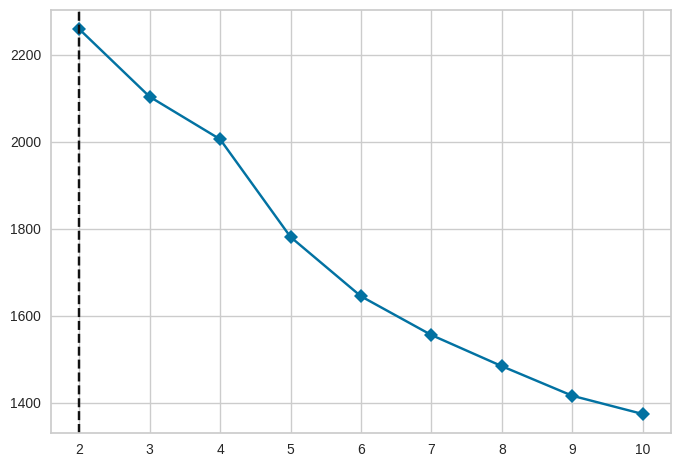

In [ ]:
Elbow_C = KElbowVisualizer(KMeans(), k=10, metric='calinski_harabasz', timings=False)
Elbow_C.fit(PCA_ds)
Elbow_C.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

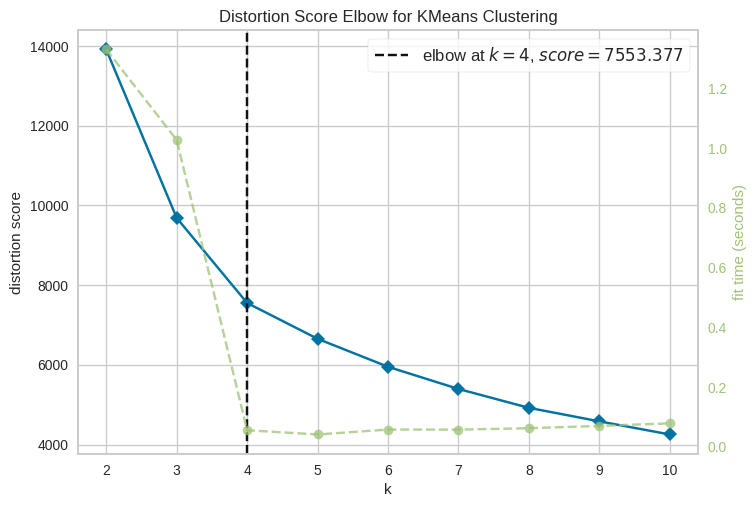

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10,  )
Elbow_M.fit(PCA_ds)
Elbow_M.show()


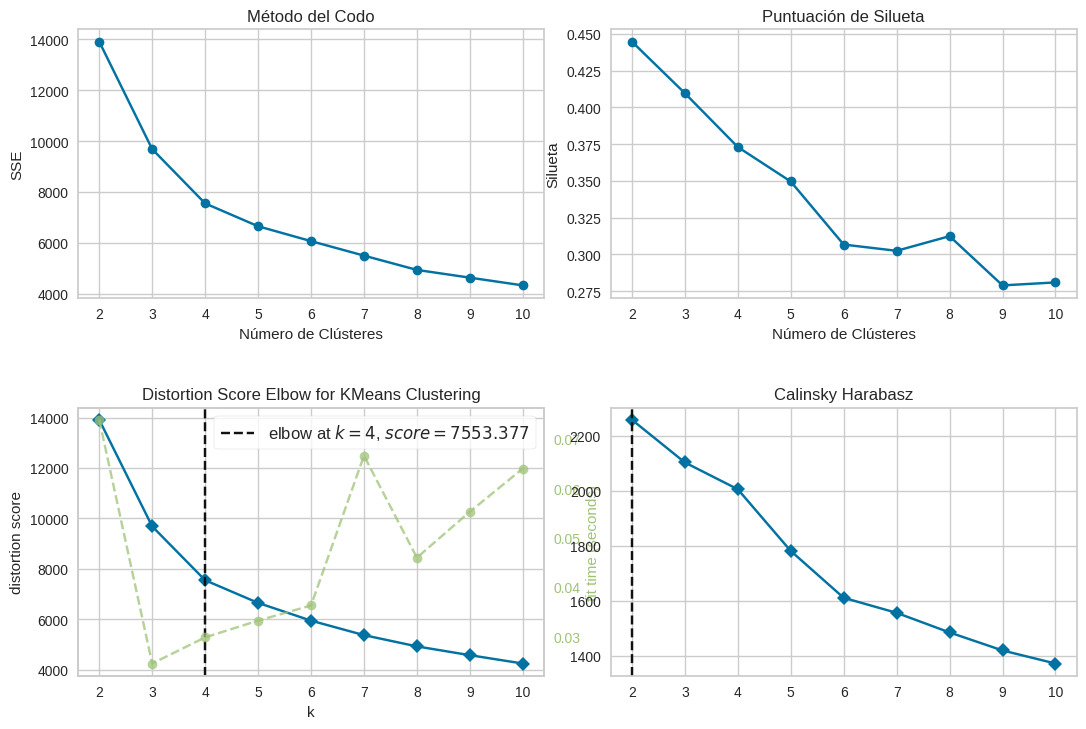

In [ ]:
#Empleamos diferentes métodos para obtener el número de clusters (k). Método del codo, silhouette, calinsky harabasz

# Encontrar el número óptimo de clústeres utilizando el método del codo
from sklearn.metrics import silhouette_score
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(PCA_ds, kmeans.labels_))

# Visualizar diferentes métodos
#Método del codo
fig=plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
fig.tight_layout(pad=4) #evita que los titulos se superpongan

#Método de silueta
ax2 = plt.subplot(2, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silueta')

#Otro método del codo
ax3 = plt.subplot(2, 2, 3)
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(PCA_ds)

#Métdodo Calinski Harabasz
ax4 = plt.subplot(2, 2, 4)
Elbow_C = KElbowVisualizer(KMeans(n_init=10), k=10, metric='calinski_harabasz', timings=False)
Elbow_C.fit(PCA_ds)

ax4.set_title('Calinsky Harabasz')
Elbow_M.show()
Elbow_C.show();

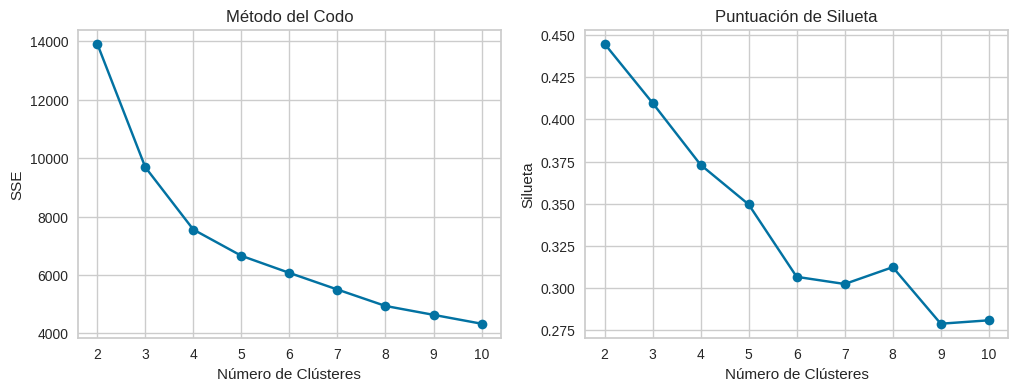

In [ ]:
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(PCA_ds, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silueta')
plt.show()

In [ ]:
#Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Añadimos los clusters al dataset original
data["Clusters"]= yhat_AC

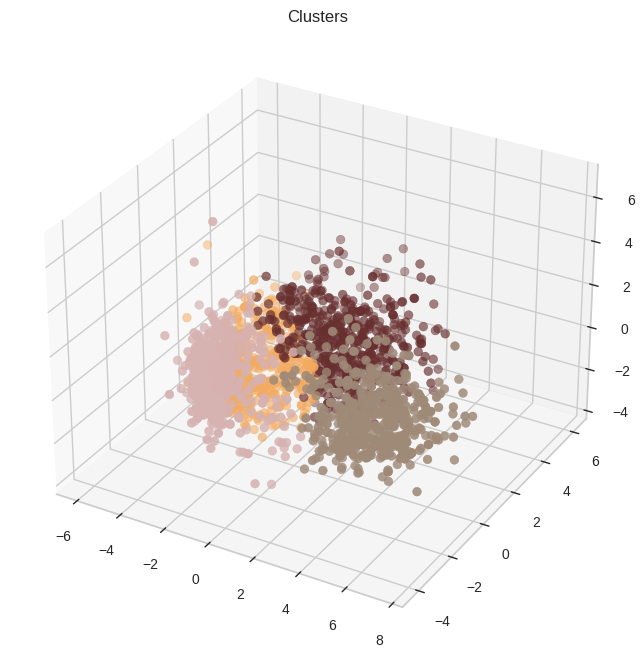

In [ ]:
#Gráfica con los 4 clusters.
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Clusters")
plt.show()

# 4.- Estudio de los grupos (Clusters).

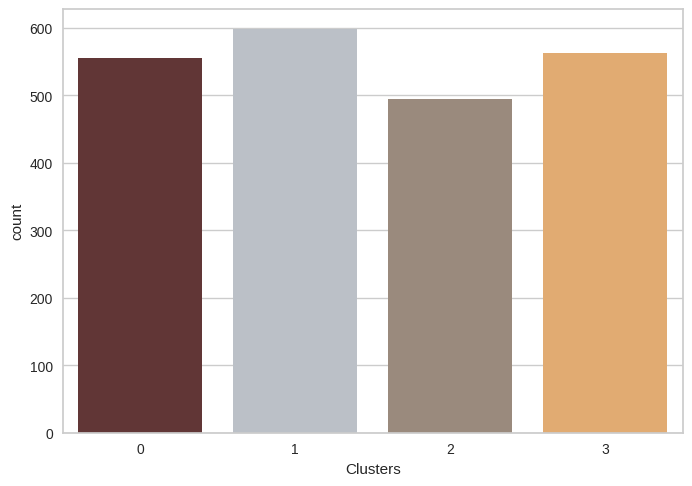

In [ ]:
#4.- Estudio de los grupos (clusters).

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
plt.show()

#Los clusters tienen una distribución uniforme, lo que indica que los grupos tienen una cantidad de clientes similar (entre 500 y 600 clientes por grupo).

In [ ]:
#Recordando estadísticas del dataset
data.describe()
#Media de Salario es 52k
#Media de Gasto es 607

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.609855,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.009042,0.150542,353.714286,54.086347,607.268083,0.645570,0.947559,2.593128,0.714286,1.481465
std,0.682635,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.094678,0.357683,202.494886,11.701599,602.513364,0.478449,0.749466,0.906236,0.451856,1.123379
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,180.000000,46.000000,69.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,356.000000,53.000000,397.000000,1.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,529.000000,64.000000,1048.000000,1.000000,1.000000,3.000000,1.000000,3.000000
max,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,699.000000,83.000000,2525.000000,1.000000,3.000000,5.000000,1.000000,3.000000


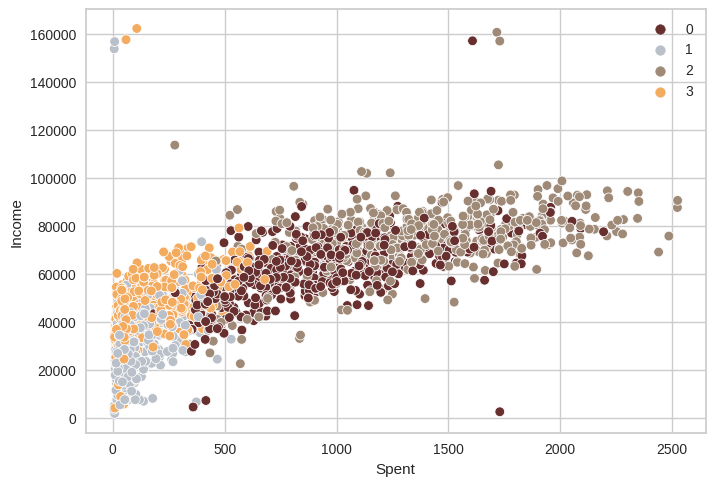

In [ ]:
#Gasto vs Salario.
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
plt.legend()
plt.show()
# Cluster 0: Ingresos medios y gastos altos.
# Cluster 1: Ingresos bajos y gastos bajos.
# Cluster 2: Ingresos altos y gastos altos.
# Cluster 3: Ingresos medios y gastos bajos.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.2% of the points cannot be plac

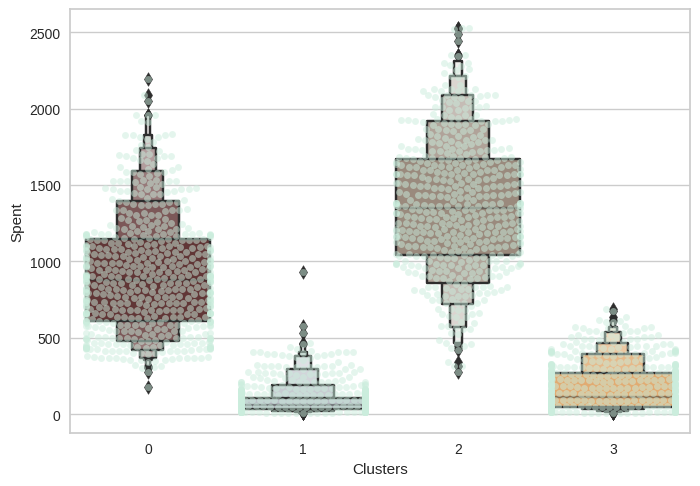

In [ ]:
#Gasto más detallado
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()
#El cluster 2 es el que más gasta seguido por el cluster 0, los clusters 1 y 3 gastan muy poco.

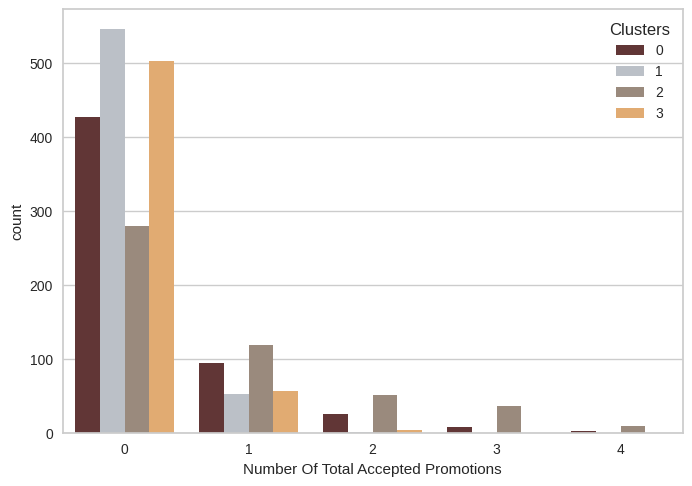

In [ ]:
#Columna sumando el total de promociones aceptadas.
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Graficando conteo de campañas de promoción aceptadas.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

#En general, las campañas promocionales no han funcionado, se deben buscar nuevas estrategías que impulsen las ventas.

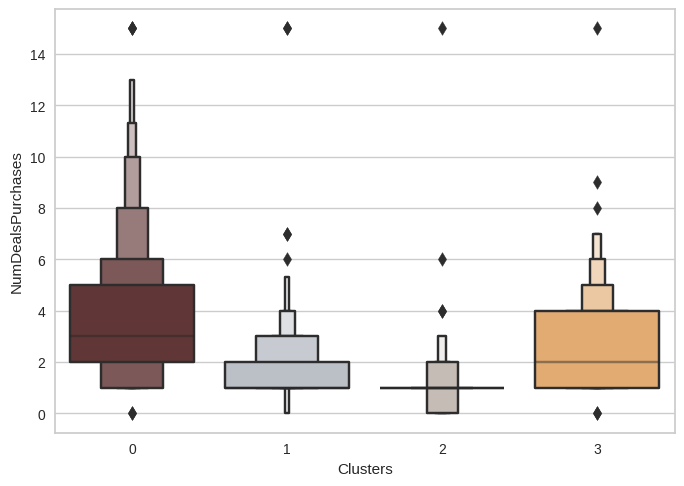

In [ ]:
#Compras con descuento realizadas
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
plt.show()

#Las compras a descuento funcionan mejor, especialmente para los clusters 0 y 3, no han sido tan efectivas para los cluesters 1 y 2.

<Figure size 800x550 with 0 Axes>

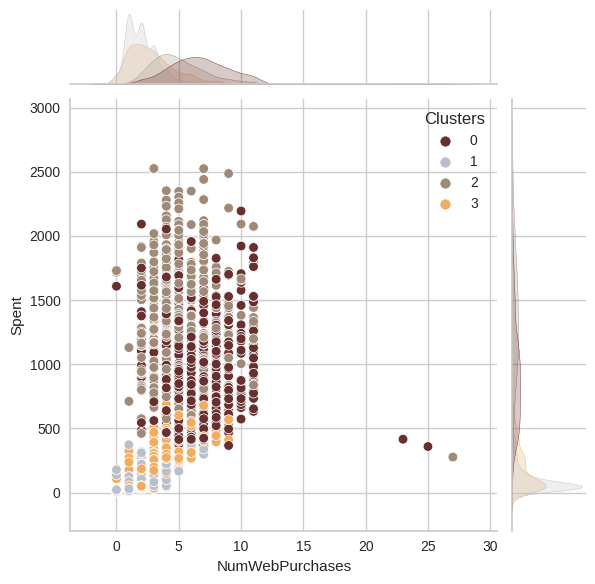

<Figure size 800x550 with 0 Axes>

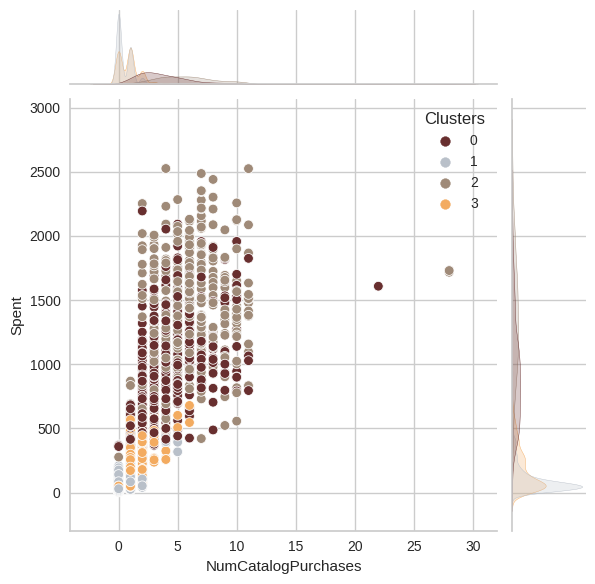

<Figure size 800x550 with 0 Axes>

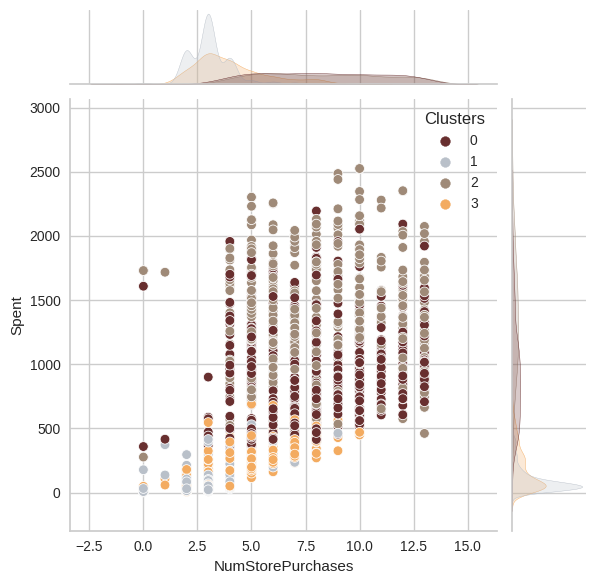

<Figure size 800x550 with 0 Axes>

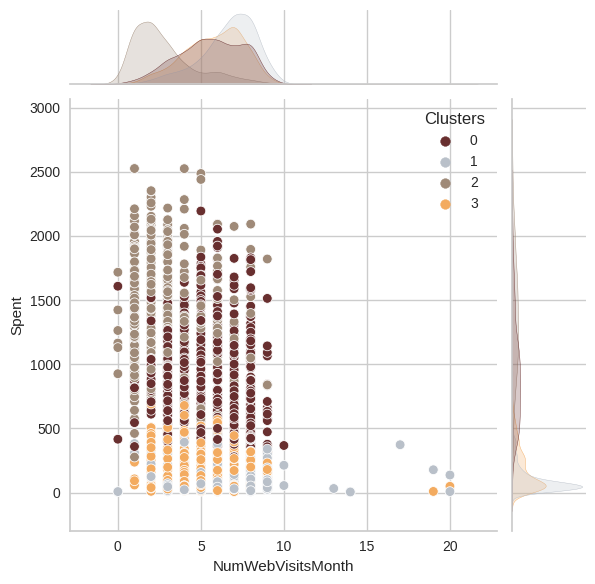

In [ ]:
#Gasto según la plataforma
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"]

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<Figure size 800x550 with 0 Axes>

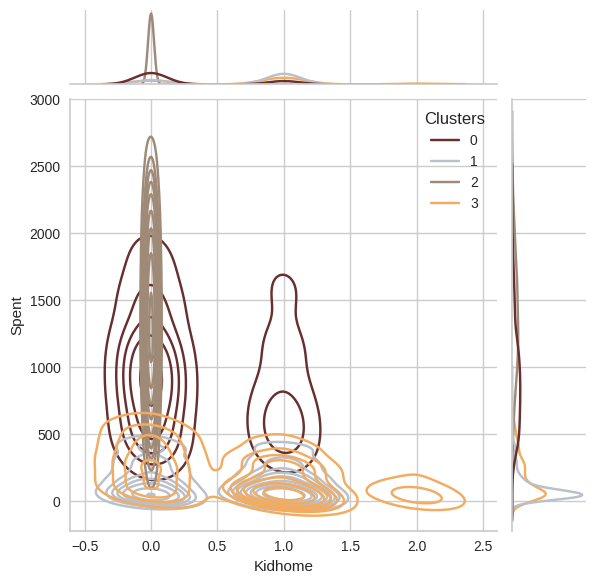

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

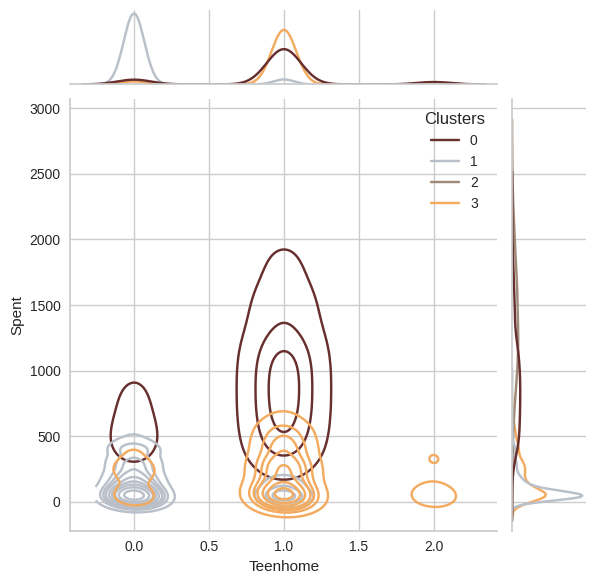

<Figure size 800x550 with 0 Axes>

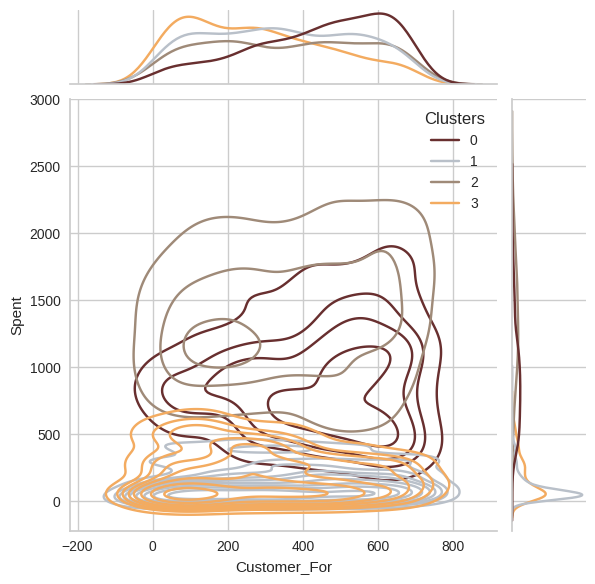

<Figure size 800x550 with 0 Axes>

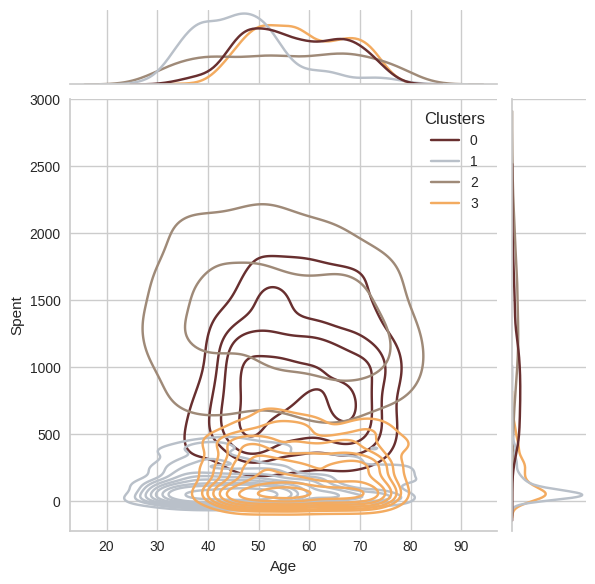

<Figure size 800x550 with 0 Axes>

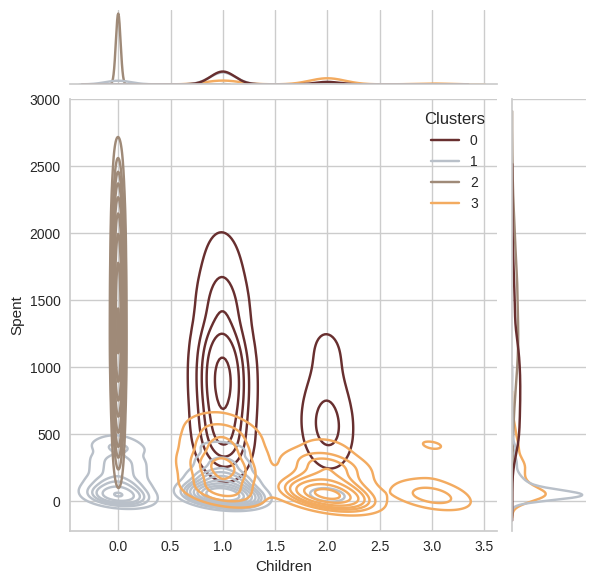

<Figure size 800x550 with 0 Axes>

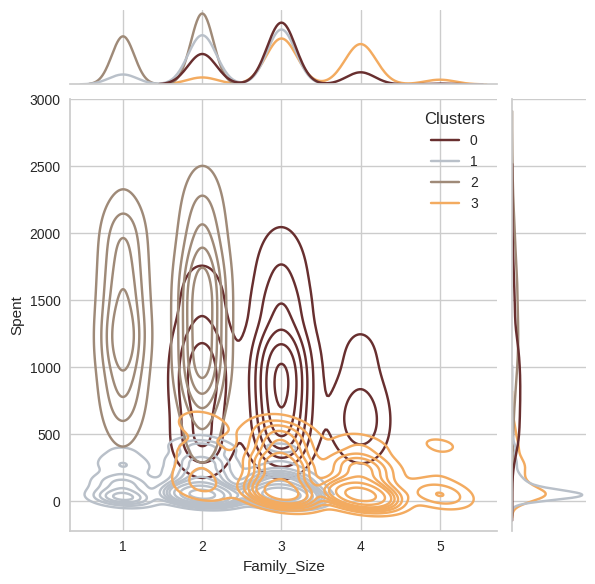

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

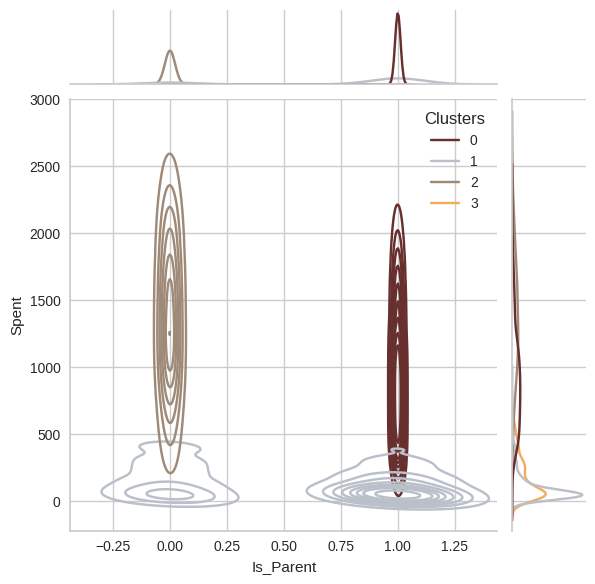

<Figure size 800x550 with 0 Axes>

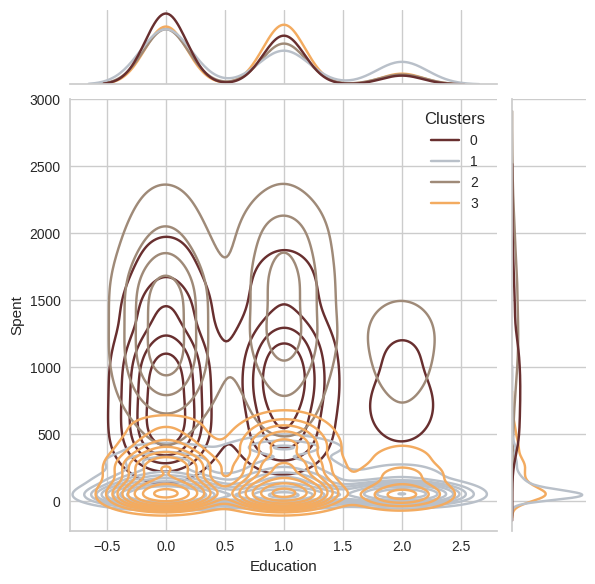

<Figure size 800x550 with 0 Axes>

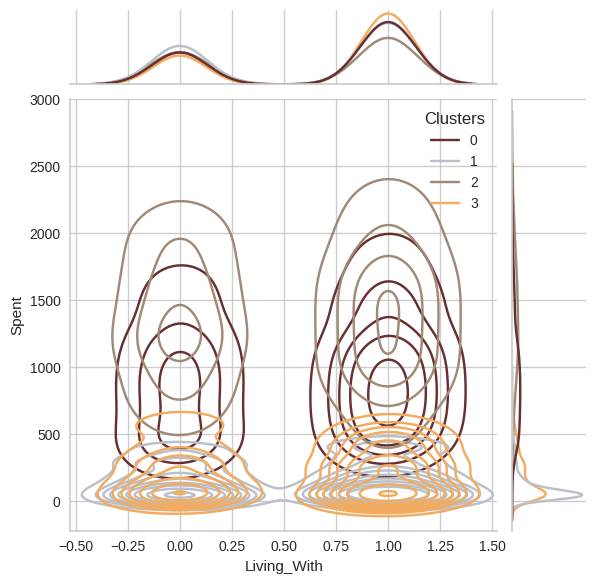

In [ ]:
#Perfil del cliente.
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


# 5.- Conclusiones del tipo de cliente (Clusters)

In [ ]:
#5.- Conclusiones según el tipo de cliente (Cluster)

# Cluster 0: Ingresos medios y gastos altos,
#            Todos son padres,
#            tienen 1 ó 2 niños, normalmente uno pequeño y un adolescente, su familia va de 2 a 4 integrantes.
#            Su rango de edad es de los 40 a los 75 años.
#            Es el grupo que más compras web realiza gastando más dinero. Si bien también hace compras en tienda física, su gasto es bajo en esta categoría.
#            Los descuentos suelen ser efectivos con este cliente.

# Cluster 1: Ingresos bajos y gastos bajos.
#            La mayoría son padres,
#            Suelen tener 1 niño pequeño, pocos tienen 1 adolescente, su familia va de 1 a 3 integrantes.
#            Su rango de edad es de los 35 a los 50 años.
#            Es el grupo que más visitas web realiza. Suele comprar por la web o en tienda física, sin embargo, es el grupo que menos compra y gasta. No suelen comprar por catálogo.
#            Los descuentos no suelen ser efectivos con este cliente.

# Cluster 2: Ingresos altos y gastos altos (Este tipo de cliente gasta más).
#            No son padres,
#            su familia va de 1 a 2 integrantes, hay un ligero número mayor de parejas que de personas solteras.
#            Su rango de edad es el más amplio, abarca todas las edades.
#            Suelen usar web, catálogo y tienda física con un ligera preferencia por tienda física para sus compras.
#            Los descuentos no suelen ser efectivos con este cliente.

# Cluster 3: Ingresos medios y gastos bajos.
#            Todos son padres,
#            su familia va de 2 a 5 integrantes, suelen tener 2 hijos, 1 niño y 1 adolescente, pueden ser casados o solteros.
#            Su rango de edad va de 50 a 70 años.
#            En general gastan poco y sólo en tienda física o web.
#            Los descuentos suelen ser efectivos con este cliente.

# 6.- Modelo de predicción de tipo de cliente (Cluster)

In [ ]:
#6.- Modelos para predecir el tipo de Cliente (Cluster)
x=data.drop(["Clusters"],axis=1)
y=data.Clusters

#Dividir dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred=svm.predict(x_train)

#Validación con K Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(svm,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

#Error
rmse = np.sqrt(-results)
rmse.mean()/y_train.mean()

1.0645551403675069

In [ ]:
#Matriz de confusión SVM
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm,x_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
conf_mz=confusion_matrix(y_train,y_train_pred)
conf_mz
#La matriz de confusión muestra que existen muchos errores fuera de la diagonal.

array([[271,  68,   0, 106],
       [186,  82,   0, 212],
       [185,  49,   0, 160],
       [119,  81,   0, 250]], dtype=int64)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_train)

#Validación con K Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(rfc,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

#Error
rmse = np.sqrt(-results)
rmse.mean()/y_train.mean()

0.3290381512535073

In [ ]:
#Matriz de confusión Random Forest
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(rfc,x_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
conf_mz=confusion_matrix(y_train,y_train_pred)
conf_mz
#La matriz de confusión muestra una mejora considerable en comparación a la de Support Vector Machine

array([[425,   4,   1,  15],
       [  1, 461,   5,  13],
       [  2,   4, 388,   0],
       [ 26,   8,   0, 416]], dtype=int64)

In [ ]:
#Aplicamos Random Forest a los datos de prueba y revisamos con la matriz de confusión
y_test_pred = rfc.predict(x_test)
conf_mz_test=confusion_matrix(y_test,y_test_pred)
conf_mz_test

#El modelo con random Forest es efectivo para la predicción del tipo de cliente (Cluster) según se muestra en la matriz de confusión.

array([[109,   0,   0,   2],
       [  0, 115,   0,   3],
       [  1,   1,  99,   0],
       [  1,   3,   0, 109]], dtype=int64)

In [ ]:
#Metodo de silhouette
# un accuracy o metricas de multiclasificacion
#XGBoost
#Resumir y concluir